In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/Users/piyush/projects/ViDA-SSL/")

In [18]:
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.io import load_json, load_txt

In [32]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
train_split_file = "/Users/piyush/projects/ViDA-SSL/data/EPIC-KITCHENS-100/splits/EPIC_100_train.csv"
val_split_file = "/Users/piyush/projects/ViDA-SSL/data/EPIC-KITCHENS-100/splits/EPIC_100_validation.csv"

In [5]:
train = pd.read_csv(train_split_file)

In [6]:
val = pd.read_csv(val_split_file)

In [7]:
train.shape, val.shape

((67217, 15), (9668, 15))

In [68]:
df = pd.concat([train, val], ignore_index=True)

In [69]:
df.shape

(76885, 15)

### Duration

In [14]:
stop = pd.to_datetime(df.stop_timestamp)
start = pd.to_datetime(df.start_timestamp)

In [15]:
times = []
for i in range(len(stop)):
    times.append(pd.Timedelta(stop[i] - start[i]).total_seconds())

In [16]:
np.mean(times)

3.189159914157508

### Label distribution

In [82]:
df["verbs"] = df["verb_class"]
df["nouns"] = df["noun_class"]

index = list((df.verbs.value_counts() > 2).index)
len(index)

97

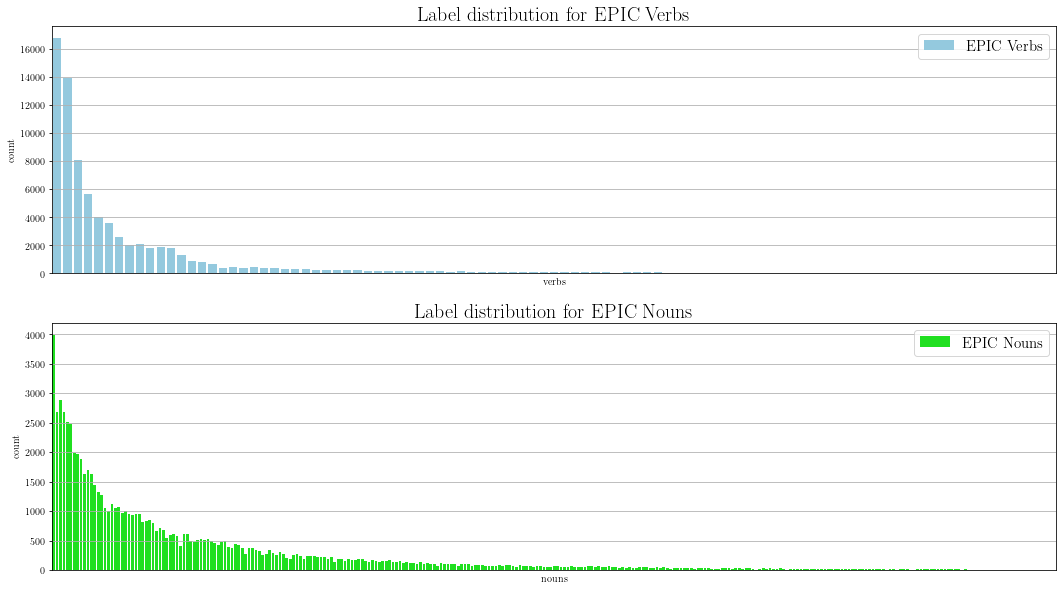

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(18, 10))

ax[0].grid()
sns.countplot(data=df, x=f"verbs", ax=ax[0], label="EPIC Verbs", color="skyblue")
ax[0].set_title("Label distribution for EPIC Verbs", fontsize=20)
ax[0].legend(fontsize=15)
ax[0].set_xticks([])

ax[1].grid()
sns.countplot(data=df, x=f"nouns", ax=ax[1], label="EPIC Nouns", color="lime")
ax[1].set_title("Label distribution for EPIC Nouns", fontsize=20)
ax[1].legend(fontsize=15)
ax[1].set_xticks([])

plt.show()